##### Importar dados dos arquivos.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/Exercícios/Medical Data Visualizer/medical_examination.csv')

In [3]:
df.head(10)

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
5,8,21914,1,151,67.0,120,80,2,2,0,0,0,0
6,9,22113,1,157,93.0,130,80,3,1,0,0,1,0
7,12,22584,2,178,95.0,130,90,3,3,0,0,1,1
8,13,17668,1,158,71.0,110,70,1,1,0,0,1,0
9,14,19834,1,164,68.0,110,60,1,1,0,0,0,0


##### Adicionar coluna de 'overweight'. 

In [4]:
# Calculando BMI
  # Criando um DataFrame diferente para não alterar o original
df2 = df.copy()

df2['BMI'] = df2['weight'] / ((df2['height'] / 100) ** 2)

In [5]:
# Inserindo a coluna 'overweight' com valores nulos
df2.insert(14, 'overweight', np.nan)

# Completando valores da coluna baseado na coluna de BMI 
df2.loc[(df2['BMI'] > 25), 'overweight'] = '1'
df2.loc[(df2['BMI'] <= 25), 'overweight'] = '0'

In [6]:
# Passando a coluna criada para o DataFrame principal
df['overweight'] = df2['overweight']
df

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,1
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1,1


In [4]:
# Outro método para inserir a coluna sem precisar criar uma coluna nova
df['overweight'] = (df['weight'] / ((df['height'] / 100) ** 2)).apply(lambda x: 1 if x > 25 else 0)

##### Normalize os dados fazendo 0 sempre bom e 1 sempre ruim. E ajustando valores fora do padrão.

In [ ]:
# Criando um DataFrame diferente para não alterar o original
df3 = df.copy()

# Tornando os valores binários
df3.loc[(df3['cholesterol'] == 1), 'cholesterol'] = 0
df3.loc[(df3['cholesterol'] > 1), 'cholesterol'] = 1

df3.loc[(df3['gluc'] == 1), 'gluc'] = 0
df3.loc[(df3['gluc'] > 1), 'gluc'] = 1

In [ ]:
# Passando as colunas alteradas para o DataFrame principal
df['cholesterol'] = df3['cholesterol']
df['gluc'] = df3['gluc']

In [5]:
# Outro método para alterar os valores das colunas sem precisar criar uma tabela nova
df['cholesterol'] = df['cholesterol'].apply(lambda x: 0 if x == 1 else 1)
df['gluc'] = df['gluc'].apply(lambda x: 0 if x == 1 else 1)

##### Construindo um gráfico categórico.

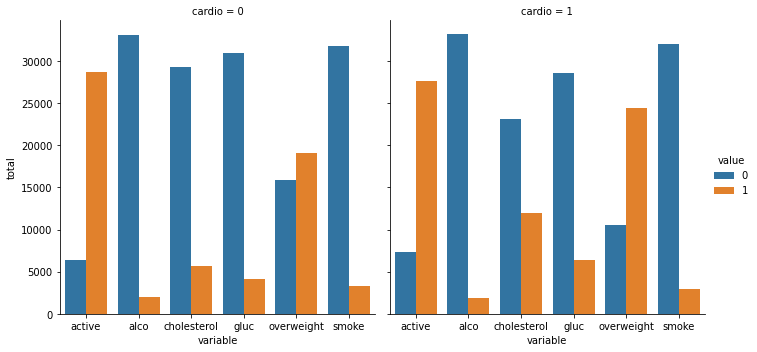

In [6]:
#  Utilizando pd.melt para reformatar e pivotar os dados
df_cat = pd.melt(df, id_vars = ["cardio"], value_vars = ['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'])

# Separar os gráficos de acordo com os valores de 'cardio'
df_cat['total'] = 1
df_cat = df_cat.groupby(['cardio', 'variable', 'value'], as_index = False).count()
  
# Plotando
fig = sns.catplot(x = 'variable', y = 'total', data = df_cat, hue = 'value', kind = 'bar', col = 'cardio').fig

fig.show()

##### Construindo um mapa de calor.

In [18]:
# Limpando os dados e inserindo-os em um DataFrame diferente
df_heat = df[
    (df['ap_lo'] <= df['ap_hi']) &
    (df['height'] >= df['height'].quantile(0.025)) &
    (df['height'] <= df['height'].quantile(0.975)) &
    (df['weight'] >= df['weight'].quantile(0.025)) &
    (df['weight'] <= df['weight'].quantile(0.975))
  ]

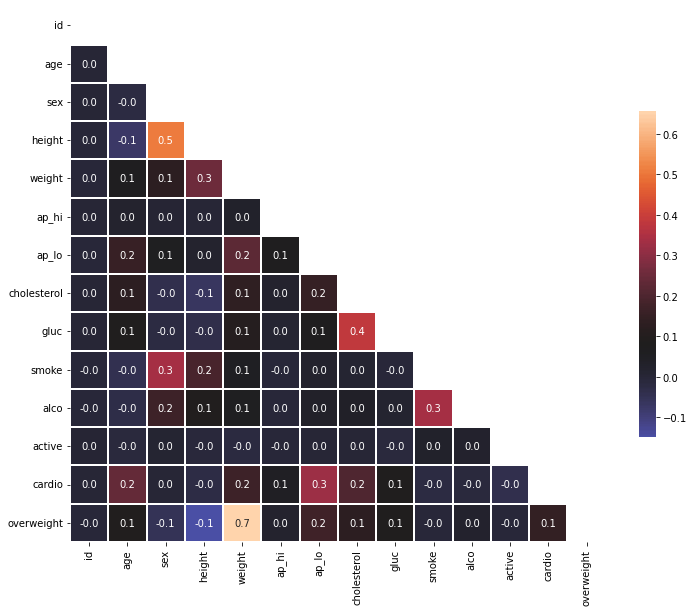

In [20]:
# Calculando a correlação entre os dados
corr = df_heat.corr(method = 'pearson')

mask = np.triu(corr)

# Preparando a figura no MatPlotLib
fig, ax = plt.subplots(figsize = (12, 12))

# Plotando o mapa de calor com o Seaborn
sns.heatmap(corr, linewidths = 1, annot = True, square = True, mask = mask, fmt = '.1f', center = 0.08, cbar_kws = {'shrink':0.5})

fig.show()